In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Function to show multiple images
def show_images(images, cols=1, titles=None):
    assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: 
        titles = ['Image (%d)' % i for i in range(1, n_images + 1)]
    
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        # Convert the number of columns to an integer
        a = fig.add_subplot(cols, int(np.ceil(n_images/float(cols))), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        a.set_title(title)
    
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()


In [3]:
import cv2

In [4]:
import numpy as np

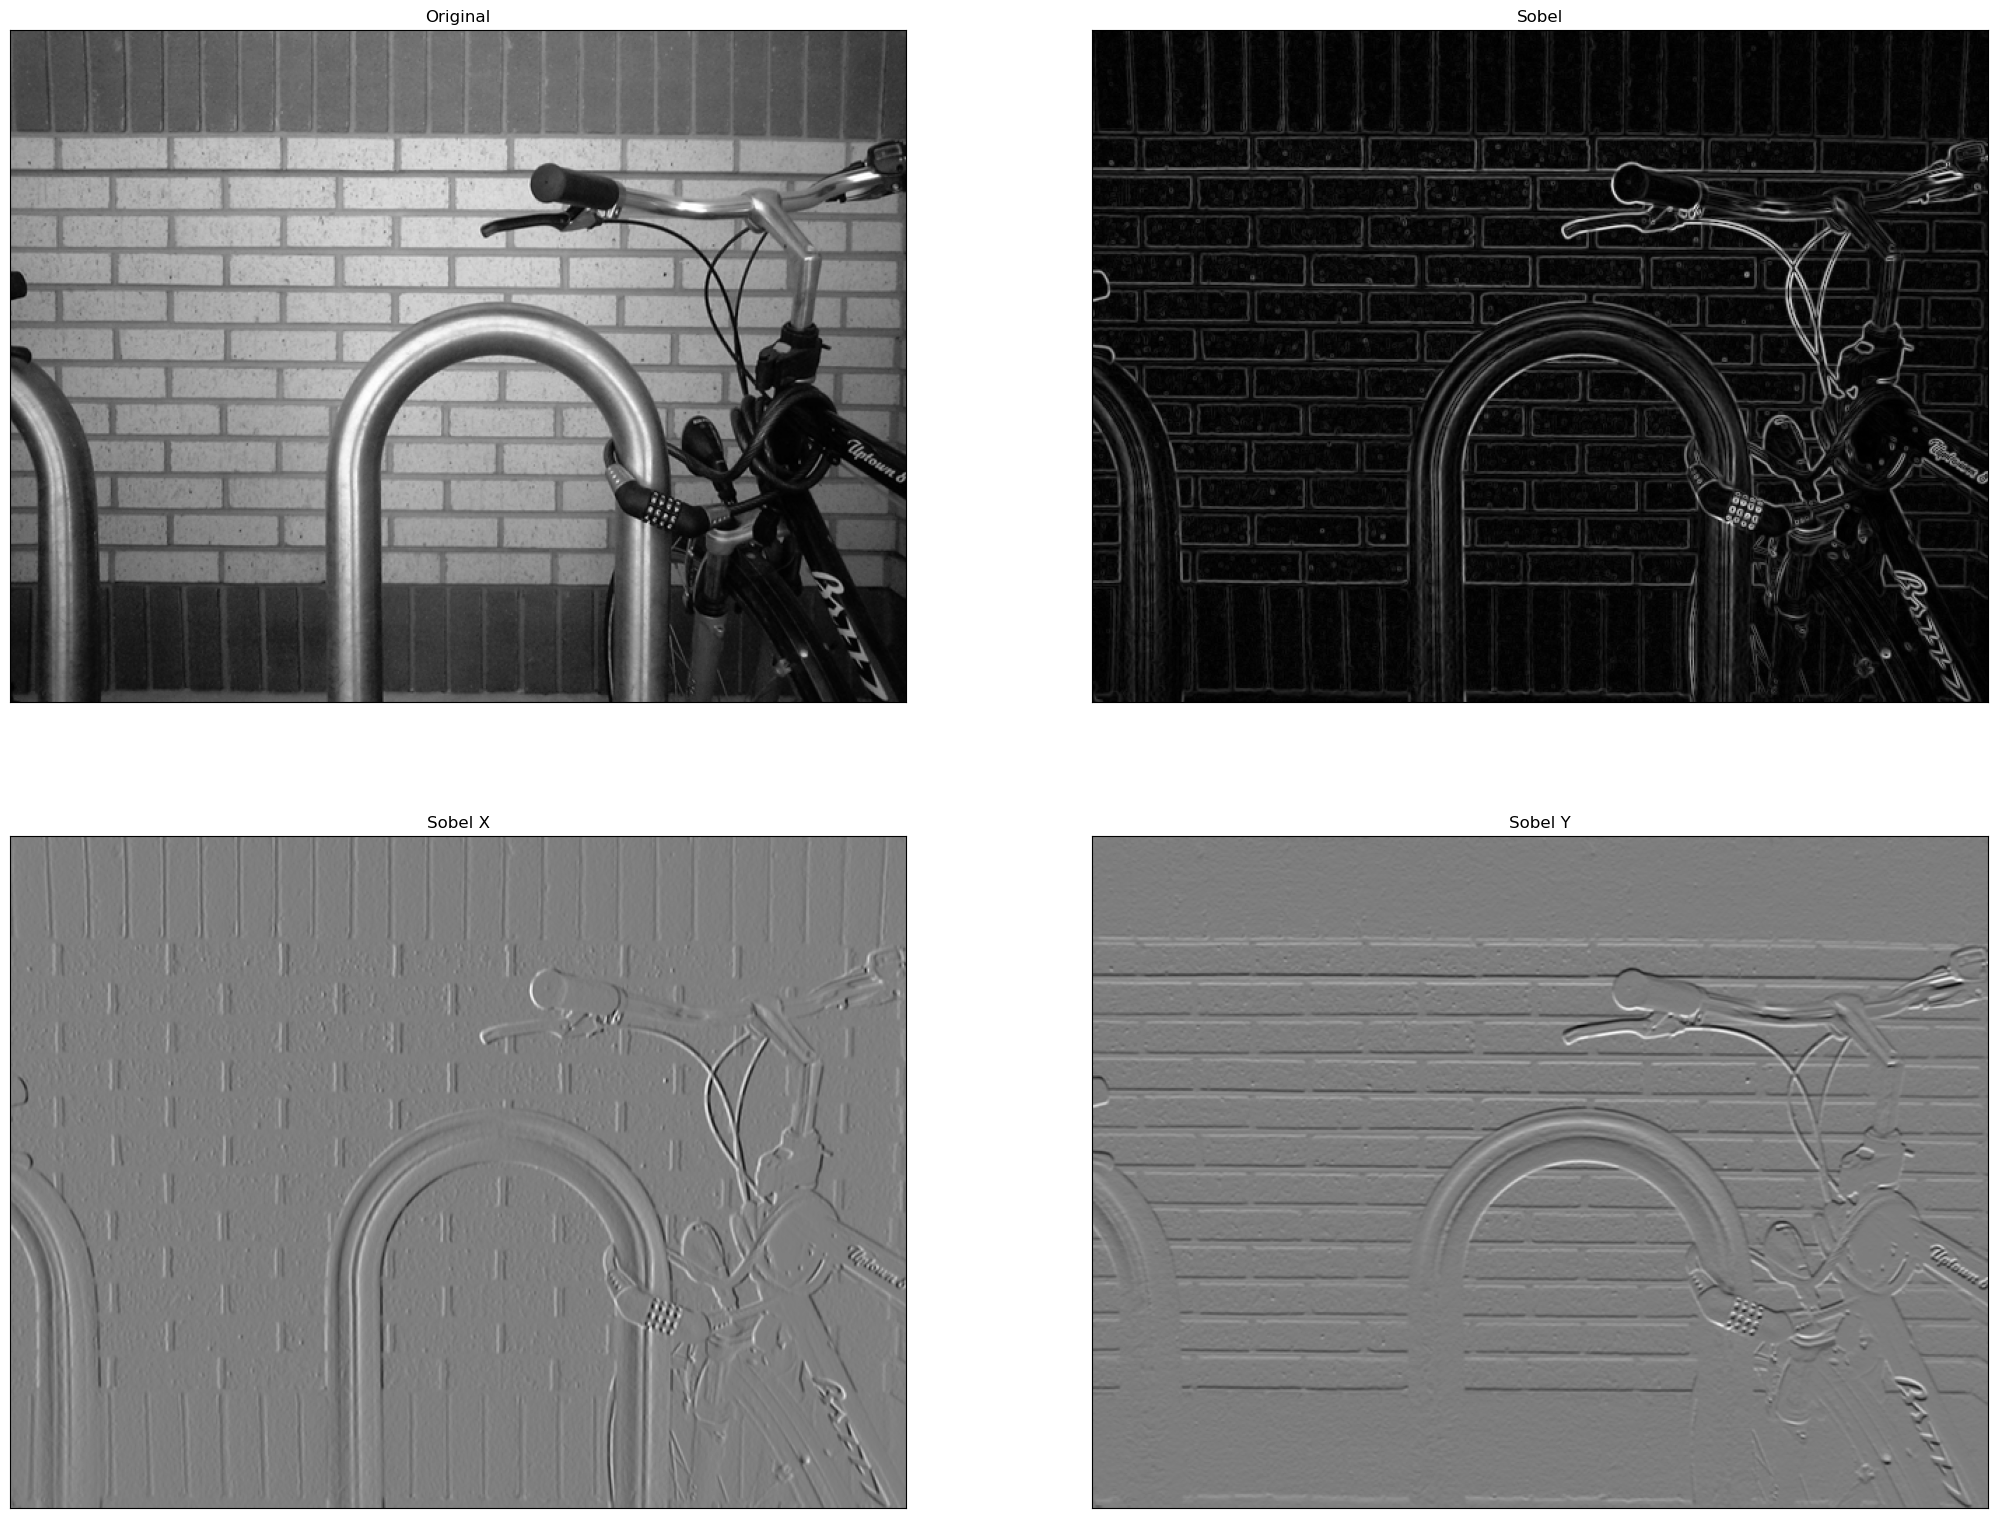

In [6]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt

def sobel_filter(img):
    img = img.astype(np.float32)

    # Sobel kernels
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

    Ky = np.array([[ 1,  2,  1],
                   [ 0,  0,  0],
                   [-1, -2, -1]])

    # Convolution
    Gx = convolve2d(img, Kx, mode='same', boundary='symm')
    Gy = convolve2d(img, Ky, mode='same', boundary='symm')

    # Gradient magnitude
    G = np.sqrt(Gx**2 + Gy**2)

    # Normalize for display
    G = (G / G.max()) * 255

    return Gx, Gy, G
   
img = cv2.imread('bike.png',cv2.IMREAD_GRAYSCALE)
Gx, Gy, G = sobel_filter(img)
show_images([img, G, Gx, Gy], 2, ['Original', 'Sobel', 'Sobel X', 'Sobel Y'])

